# Setting up Notebook

In [245]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
from sklearn.datasets import load_iris

# Loading Data
Loading the iris flower dataset using sklearn built-in datasets

In [247]:
sns.set()

In [248]:
data = datasets.load_iris()

In [249]:
data.keys() # We can see the intersting attributes in the dictionary 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [250]:
print(data["DESCR"]) # This shows the interesting description of the datasets including different classes of the flower, statistical summary, and such.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [251]:
data ['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [252]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [253]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [254]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [255]:
df['target'] = data['target']

In [256]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [258]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Relationship of features with the target

In [260]:
data['target_names'] # Creating new column with species name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [261]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [262]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Implementing train test split

In [264]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42, stratify=df['target'])

In [265]:
df_train.shape

(120, 6)

In [266]:
df_test.shape

(30, 6)

In [267]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
8,4.4,2.9,1.4,0.2,0,setosa
106,4.9,2.5,4.5,1.7,2,virginica
76,6.8,2.8,4.8,1.4,1,versicolor
9,4.9,3.1,1.5,0.1,0,setosa
89,5.5,2.5,4.0,1.3,1,versicolor


# Now we prepare our data for modeling

In [269]:
X_train = df_train.drop(columns=['target', 'target_name']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target', 'target_name']).values
y_test = df_test['target'].values
target_names = data.target_names #['setosa', 'versicolor', 'virginica']

In [270]:
X_train, y_train # checking how our data looks like for X, y training.

(array([[4.4, 2.9, 1.4, 0.2],
        [4.9, 2.5, 4.5, 1.7],
        [6.8, 2.8, 4.8, 1.4],
        [4.9, 3.1, 1.5, 0.1],
        [5.5, 2.5, 4. , 1.3],
        [6.3, 2.5, 5. , 1.9],
        [5.6, 2.7, 4.2, 1.3],
        [6.3, 2.8, 5.1, 1.5],
        [7.7, 3. , 6.1, 2.3],
        [7.7, 3.8, 6.7, 2.2],
        [7.6, 3. , 6.6, 2.1],
        [6. , 2.9, 4.5, 1.5],
        [5. , 2. , 3.5, 1. ],
        [5.8, 2.7, 4.1, 1. ],
        [5.8, 2.6, 4. , 1.2],
        [4.7, 3.2, 1.6, 0.2],
        [5.1, 3.8, 1.5, 0.3],
        [6.7, 2.5, 5.8, 1.8],
        [6.4, 3.1, 5.5, 1.8],
        [5.4, 3.4, 1.5, 0.4],
        [6.3, 2.5, 4.9, 1.5],
        [5.1, 3.8, 1.6, 0.2],
        [7.9, 3.8, 6.4, 2. ],
        [5. , 3. , 1.6, 0.2],
        [5.5, 2.4, 3.7, 1. ],
        [6.3, 2.9, 5.6, 1.8],
        [6.4, 2.7, 5.3, 1.9],
        [5. , 3.4, 1.6, 0.4],
        [5.6, 2.8, 4.9, 2. ],
        [5. , 3.5, 1.3, 0.3],
        [5.1, 3.7, 1.5, 0.4],
        [6.1, 2.8, 4. , 1.3],
        [6.1, 3. , 4.6, 1.4],
        [5

# Let's create a scatterd plot

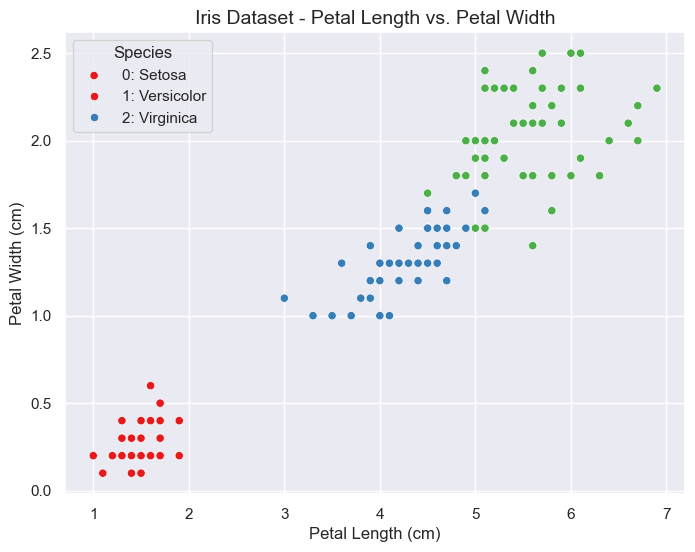

In [272]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal length (cm)'], 
    y=df['petal width (cm)'], 
    hue=df['target'],
    palette='Set1'
   )
plt.title("Iris Dataset - Petal Length vs. Petal Width", fontsize=14)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.legend(title="Species", labels=['0: Setosa', '1: Versicolor', '2: Virginica'])
plt.show()

# Now, let's train the decision tree model
After the training also making predictions and calulating accuracy score. 

In [274]:
dt_model = DecisionTreeClassifier(
    random_state=42, 
    max_depth=3, 
    min_samples_split=3,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples to be in a leaf node
    max_features='sqrt'   # Limit number of features considered for each split
)
dt_model.fit(X_train, y_train) # Train the model

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, random_state=42)

In [275]:
y_prediction = dt_model.predict(X_test) # Evaluating the model

In [276]:
accuracy = accuracy_score(y_test, y_prediction)

# Using 'weighted' average for multi-class precision/recall/f1
precision = precision_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')

# We will now analyze confusion matrix for more detail performance of the model
This will evaluate True positives(predicted correctly), False positives(predicted incorrectly), True negatives(regected correctly), False negatives(predicted incorrectly)

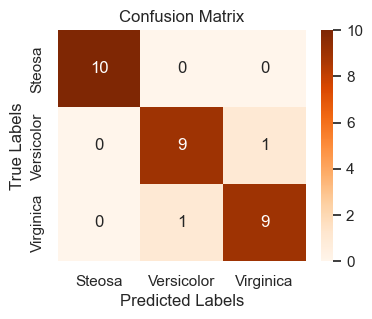

Model accuracy:  93.33%


In [278]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)

# Plotiing the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Steosa', 'Versicolor', 'Virginica'],
            yticklabels=['Steosa', 'Versicolor', 'Virginica'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy = accuracy_score(y_test, y_prediction)
print(f'Model accuracy: {accuracy * 100: .2f}%')

In [279]:
from sklearn.model_selection import cross_val_score

# Use the *entire* dataset (X, y before splitting)
X_full = df.drop(columns=['target', 'target_name']).values
y_full = df['target'].values

# Re-initialize the model (cross_val_score does the fitting)
dt_model_cv = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt'
)

# Perform 5-fold cross-validation (common choice)
cv_scores = cross_val_score(dt_model_cv, X_full, y_full, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average cross-validation accuracy: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores) * 100:.2f}%")

Cross-validation accuracy scores: [0.96666667 0.96666667 0.9        0.86666667 1.        ]
Average cross-validation accuracy: 94.00%
Standard deviation of cross-validation accuracy: 4.90%


In [280]:
# Save the plot to log it
confusion_matrix_path = "initial_confusion_matrix.png"
plt.savefig(confusion_matrix_path)
plt.close()

In [281]:
mlflow.set_experiment("iris_decision_tree")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
# Defining hyperparameters
tree_params = {
    "random_state": 42,
    "max_depth": 3,
    "min_samples_split": 3,
    "min_samples_leaf": 2,
    "max_features": "sqrt"
}
run_id = None #Initializing run_id
with mlflow.start_run(run_name="Iris_DecisionTree_run") as run:
    #Logging parameters
    mlflow.log_params(tree_params) # logging all the parameters from the dictionary
  
    #Logging metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # logging the confusion matrix plot
    print("- Logging confusion matrix artifact---")
    mlflow.log_artifact(confusion_matrix_path)

    # Now we log the model
    mlflow.sklearn.log_model(dt_model, "Decision_Tree_Model")
    # Getting the run ID for the later use
    run_id = run.info.run_uuid
    print(f"\nMLflow Run Complete. Run ID: {run_id}")
    print(f"View run in MLflow UI: http:/127.0.0.5000/#/experiments/{mlflow.get_experiment_by_name('iris_decision_tree').experiment_id}/runs{run_id}")

- Logging confusion matrix artifact---


2025/04/13 23:11:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLflow Run Complete. Run ID: ebe4218100574f4ebc9ec05dd9da803f
View run in MLflow UI: http:/127.0.0.5000/#/experiments/1/runsebe4218100574f4ebc9ec05dd9da803f
🏃 View run Iris_DecisionTree_run at: http://127.0.0.1:5000/#/experiments/1/runs/ebe4218100574f4ebc9ec05dd9da803f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


# Now we Load Model from MLflow

In [283]:
if run_id:
    print(f"\n--Loading Model from MLflow (Run ID: {run_id})---")
    # Constructing the model URI using run ID
    # Format: runs:/<run_id>/<artifact_path_to_model>
    model_uri = f"runs:/{run_id}/decision_tree_model"
    print(f"Loading model from: {model_uri}")

    # Loading the model (using pyfunc for generality, works for sklearn as well)
    loaded_model = mlflow.pyfunc.load_model(model_uri)

    # Alternatively, specifically for sklearn:
    # loaded_model = mlflow.sklearn.load_model(model_uri)
    print("Model loaded successfully")

    # Here we use the loaded model
    print("\n---Using the loaded model for predictions----")
# Using the loaded model to predict on the same test set to verify
    loaded_y_prediction = loaded_model.predict(X_test)

# Calculate metrics for the loaded model's predictions
    loaded_accuracy = accuracy_score(y_test, loaded_y_prediction)
    loaded_precision = precision_score(y_test, loaded_y_prediction, average='weighted')
    loaded_recall = recall_score(y_test, loaded_y_prediction, average='weighted')
    loaded_f1 = f1_score(y_test, loaded_y_prediction, average='weighted')

    print(f"Prediction sample (first 5): {loaded_y_prediction[:5]}")
    print(f"Actual labels (first 5): {y_test[:5]}")
    print(f"Accuracy of loaded model on test set: {loaded_accuracy*100:.2f}%")
    print(f"Precison of loaded model on test set: {loaded_precision*100:.2f}%")
    print(f"Recall of loaded model on test set: {loaded_recall*100:.2f}%")
    print(f"f1_score of loaded model on test set: {loaded_f1*100:.2f}%")

# Verify the accuracy matches the original
    if abs(accuracy - loaded_accuracy) < 0.0001:
        print("Loaded model accuracy matches original model accuracy. Verification successful!")
        
    else:
        print("WARNING: Loaded model accuracy differs from original model accuracy.")

else:
    print("\nMLflow run failed or run_id not captured. Skipping model loading and testing.")

print("\nScript finished.")


--Loading Model from MLflow (Run ID: ebe4218100574f4ebc9ec05dd9da803f)---
Loading model from: runs:/ebe4218100574f4ebc9ec05dd9da803f/decision_tree_model
Model loaded successfully

---Using the loaded model for predictions----
Prediction sample (first 5): [0 2 1 1 0]
Actual labels (first 5): [0 2 1 1 0]
Accuracy of loaded model on test set: 93.33%
Precison of loaded model on test set: 93.33%
Recall of loaded model on test set: 93.33%
f1_score of loaded model on test set: 93.33%
Loaded model accuracy matches original model accuracy. Verification successful!

Script finished.
